#### EasyHome has a goal of growing 8% YoY in traffic. Currently this goal is not met, with EasyHome trending at 5% YoY growth in visits.

See the dataset attached, which provides a data sample on 100.000 visitors of our platform. It shows their activity during 28 days in January, and shows their number of visits in the next 3 months. It also holds a data layout with column descriptions.

The Head of Marketing has come to you to ask for your advice. Please help him by giving a presentation of about 20-30 minutes in which you use the data to answer the following questions:

•What type of visitors should we aim for to increase our number of visits, and why?
•Any other insights that might be interesting to inspire the Marketing team with.


In [2]:
import pandas as pd

In [3]:
df=pd.read_excel('AnalysisData_260620.xlsx','1A.Dataset')

In [4]:
df.shape

(100000, 13)

In [5]:
df.head()

,Visitor,ENCRPTD_USER_ID,FREE_ADS,PAID_ADS,REPLIES,FREQUENCY,CAT_ID,Category,VISITS M1,VISITS_M2,VISITS_M3,VISITS_M4,Churn
0,Seller,27,1.079300,1.894284,0.947142,1,621,Women,1,0,0,0,1
1,Seller,48,9.395941,3.196043,2.000000,1,621,Women,1,0,0,0,1
2,Seller,96,9.173236,2.224188,1.112094,1,621,Women,1,0,0,0,1
3,Seller,114,2.058516,1.241832,0.620916,1,621,Women,1,0,0,0,1
4,Seller,147,1.764715,4.869534,2.434767,1,621,Women,1,0,0,0,1


In [6]:
#no. of unique values!
df.nunique()

Visitor                 2
ENCRPTD_USER_ID    100000
FREE_ADS            63029
PAID_ADS            62814
REPLIES             39266
FREQUENCY              28
CAT_ID                 36
Category               36
VISITS M1             387
VISITS_M2             389
VISITS_M3             424
VISITS_M4             391
Churn                   2
dtype: int64

In [7]:
df['Category'].unique()

array(['Women', 'Plants', 'Hobby', 'Books', 'Medical', 'Home lighting',
       'Software', 'Apparatus', 'Baby', 'Make up', 'DIY Home',
       'Musical instruments', 'Gardening', 'Cycles', 'Audio, TV', 'Games',
       'Vacation homes', 'Laptop parts', 'Sports', 'Laptop', 'Animals',
       'Telecommunication', 'Houses buy', 'Holiday', 'Male', 'Tickets',
       'Diverse', 'Children', 'Vacancies', 'Office', 'Water sport',
       'Toys', 'CD and DVDs', 'Antique and Decoration', 'Transport',
       'Posts'], dtype=object)

In [8]:
df.drop(labels='ENCRPTD_USER_ID',axis=1,inplace=True)

In [9]:
#churn of visitors
(df['Churn'].value_counts(normalize=True)*100)

0    93.238
1     6.762
Name: Churn, dtype: float64

In [10]:
#churn by visitor category
(df.groupby('Visitor')['Churn'].value_counts(normalize=True)*100)

Visitor  Churn
Buyer    0        95.571791
         1         4.428209
Seller   0        92.562506
         1         7.437494
Name: Churn, dtype: float64

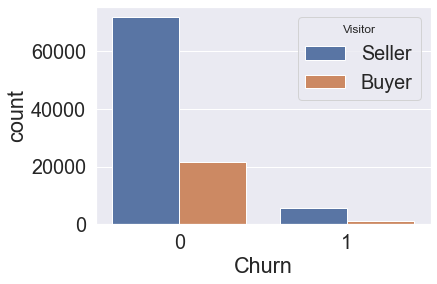

In [15]:
sns.countplot(x="Churn",hue='Visitor', data=df)

##### "4% of churn rate for buyers and 7% for a seller"

In [ ]:
df['Category'].value_counts()

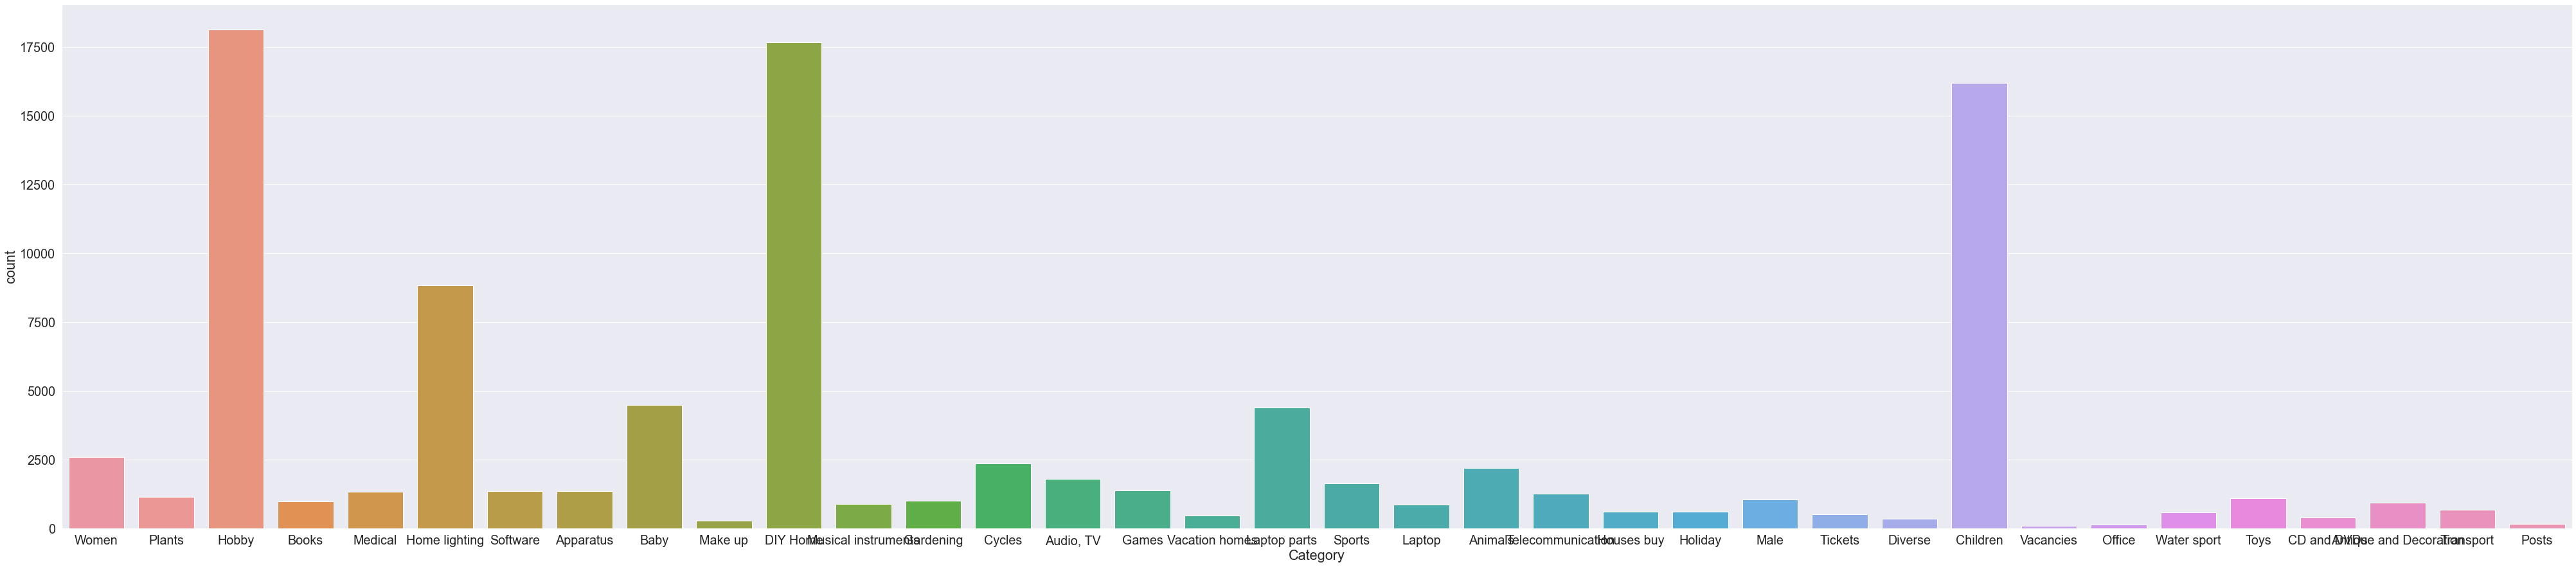

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(70,15))
sns.set(font_scale=1.8)
sns.countplot(x="Category", data=df)

##### hobby and DIY Home, Children are more in counts of category!

In [16]:
df['Visitor'].value_counts()

Seller    77553
Buyer     22447
Name: Visitor, dtype: int64

### Seller are 71% more in number than potential buyer on the platform

In [ ]:
df['Visitor'].value_counts(normalize=True)

In [ ]:
df.groupby('Category')['Visitor'].value_counts()

In [ ]:
plt.figure(figsize=(70,15))
sns.set(font_scale=1.8)
sns.countplot(x="Category",hue='Visitor', data=df)

### Hobby, DIY Home, Children category have imbalance visitors where Sellers are more in number than Buyers!

In [ ]:
df_g=df.groupby('Category')['Churn'].value_counts()

#### to use .plot() first we need to unstack

In [ ]:
df1 = df_g.unstack()
df1.head()

In [ ]:
df1.plot(kind='bar', figsize=(43, 5))
plt.ylabel('count')
plt.show()

this graph shows the churn is most in children, DIYHOME and Hobby

### The churn is most in DIY HOME, Children and hooby which can be seen such that because of the presence of no. of buyers and sellers are so imbalanced that visitors tend to leave the category most

### The company needs to focus in building more number of buyers and maintain the balance of supply and demand!

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [12]:
#convert datatype of certain fields to interger
df=df.astype({'FREE_ADS':'int','PAID_ADS':'int','REPLIES':'int'})
df.head()

,Visitor,FREE_ADS,PAID_ADS,REPLIES,FREQUENCY,CAT_ID,Category,VISITS M1,VISITS_M2,VISITS_M3,VISITS_M4,Churn
0,Seller,1,1,0,1,621,Women,1,0,0,0,1
1,Seller,9,3,2,1,621,Women,1,0,0,0,1
2,Seller,9,2,1,1,621,Women,1,0,0,0,1
3,Seller,2,1,0,1,621,Women,1,0,0,0,1
4,Seller,1,4,2,1,621,Women,1,0,0,0,1


In [13]:
df.nunique()

Visitor        2
FREE_ADS     235
PAID_ADS      21
REPLIES      271
FREQUENCY     28
CAT_ID        36
Category      36
VISITS M1    387
VISITS_M2    389
VISITS_M3    424
VISITS_M4    391
Churn          2
dtype: int64

In [35]:
#to check correlation
df.corr()

,FREE_ADS,PAID_ADS,REPLIES,FREQUENCY,CAT_ID,VISITS M1,VISITS_M2,VISITS_M3,VISITS_M4,Churn
FREE_ADS,1.000000,0.042978,0.046923,0.091878,0.025516,0.147959,0.133314,0.121272,0.112064,-0.011492
PAID_ADS,0.042978,1.000000,0.010532,0.021647,0.182092,0.042012,0.035538,0.030021,0.029543,0.000060
REPLIES,0.046923,0.010532,1.000000,0.308204,0.000897,0.424684,0.362307,0.329387,0.313516,-0.042625
FREQUENCY,0.091878,0.021647,0.308204,1.000000,-0.029336,0.817900,0.705893,0.661063,0.628207,-0.227544
CAT_ID,0.025516,0.182092,0.000897,-0.029336,1.000000,-0.023891,-0.013390,-0.010311,-0.007979,0.007087
VISITS M1,0.147959,0.042012,0.424684,0.817900,-0.023891,1.000000,0.847699,0.780993,0.739577,-0.144561
VISITS_M2,0.133314,0.035538,0.362307,0.705893,-0.013390,0.847699,1.000000,0.862892,0.785397,-0.166544
VISITS_M3,0.121272,0.030021,0.329387,0.661063,-0.010311,0.780993,0.862892,1.000000,0.862947,-0.163739
VISITS_M4,0.112064,0.029543,0.313516,0.628207,-0.007979,0.739577,0.785397,0.862947,1.000000,-0.159825
Churn,-0.011492,0.000060,-0.042625,-0.227544,0.007087,-0.144561,-0.166544,-0.163739,-0.159825,1.000000


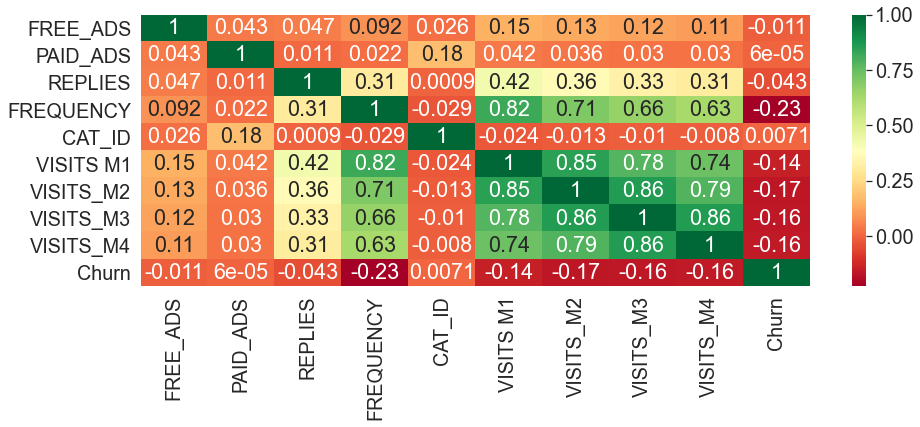

In [36]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

###### the data has no correlation with target variable i.e. churn

In [43]:
# import same excel_file with different worksheet
df2=pd.read_excel('AnalysisData_260620.xlsx','Sheet3')

In [44]:
df2.shape

(36, 6)

In [45]:
df2.head()

,Category,Seller,Buyer,ChurnRate (Sellers),Churn Rate(buyers),Churn Rate(category)
0,Hobby,17659,490,0.097514,0.034694,0.095818
1,DIY Home,14966,2704,0.096819,0.069896,0.092699
2,Children,14368,1844,0.104051,0.079718,0.101283
3,Home lighting,6011,2818,0.027450,0.035841,0.030128
4,Baby,3205,1296,0.020281,0.023148,0.021106


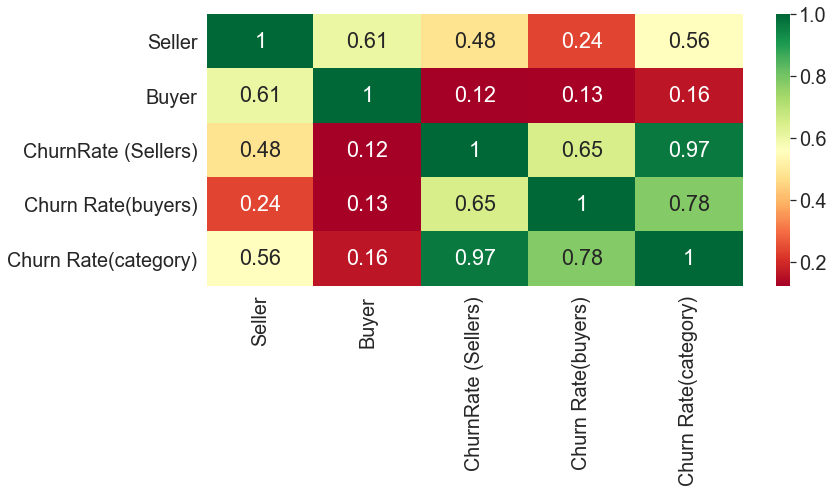

In [49]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,5))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### churn rate of category is intensly correlated with churn of sellers and buyers, but more on buyers because sellers are leaving the platform more in numbers!

In [50]:
df.head()

,Visitor,FREE_ADS,PAID_ADS,REPLIES,FREQUENCY,CAT_ID,Category,VISITS M1,VISITS_M2,VISITS_M3,VISITS_M4,Churn
0,Seller,1,1,0,1,621,Women,1,0,0,0,1
1,Seller,9,3,2,1,621,Women,1,0,0,0,1
2,Seller,9,2,1,1,621,Women,1,0,0,0,1
3,Seller,2,1,0,1,621,Women,1,0,0,0,1
4,Seller,1,4,2,1,621,Women,1,0,0,0,1


In [51]:
df.nunique()

Visitor        2
FREE_ADS     235
PAID_ADS      21
REPLIES      271
FREQUENCY     28
CAT_ID        36
Category      36
VISITS M1    387
VISITS_M2    389
VISITS_M3    424
VISITS_M4    391
Churn          2
dtype: int64

The evident reason from data of visitor's churn is imbalance in supply and demand, however the hidden reason can be as follows!

- customers aren’t achieving their desired outcomes
- customers think competitors can do a better job
- product has bugs customers believe the company can’t fix/ or has not
- customers think your product’s too expensive (or too cheap)

Customer churn can reduced to a level by
- improving the customer support 
- running loyalty programs
- maybe the onboarding procedure is too tedious make it simple
- under customer life time value